In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sp
import sklearn as sl
import seaborn as sns
import os 
from shutil import move
import OmicsUtils.preprocess_utils

In [2]:
pre_processor = OmicsUtils.preprocess_utils.PreProcessor()

31/10//2023 08:20:1698763822 PM - DEBUG - PreProcessor: Initialized PreProcessor Class for TCGA data
31/10//2023 08:20:1698763822 PM - DEBUG - PreProcessor: Initialized Omics PreProcessor class


In [3]:
main_dir = './Transcriptomics/data/gdc_download_20231029_065307.485337/'
sample_ids, folder_paths = pre_processor.get_sample_ids_folder_names_file_names(main_dir)

In [4]:
sample_sheet_tgca= pd.read_csv('./Transcriptomics/data/gdc_sample_sheet.2023-10-29.tsv', sep='\t')

In [15]:
sample_sheet_tgca['file_identifier'] = [sample_sheet_tgca['File Name'].to_numpy()[i].split('.')[0] for i in range(sample_sheet_tgca.shape[0])]

## Get all tsv file paths

In [6]:
sample_ids, folder_paths = pre_processor.get_sample_ids_folder_names_file_names(main_dir)

In [7]:
file_paths, file_names, file_idx =  pre_processor.get_list_of_tsv_files(main_dir)

In [10]:
file_paths

['./Transcriptomics/data/gdc_download_20231029_065307.485337/12b3d9cf-18af-4930-8d5e-2093f0f82df1/67624292-fd1c-4e48-bd04-aaba940d2c84.rna_seq.augmented_star_gene_counts.tsv',
 './Transcriptomics/data/gdc_download_20231029_065307.485337/2f9b9698-edc6-4049-809c-9733f05f5c2b/ed920009-6bce-4300-b928-14d0ec474ac6.rna_seq.augmented_star_gene_counts.tsv',
 './Transcriptomics/data/gdc_download_20231029_065307.485337/0a4e4402-13a5-4eea-b70c-b121bcf81156/6abcbd13-ff11-46d6-9ce0-6204a6658c39.rna_seq.augmented_star_gene_counts.tsv',
 './Transcriptomics/data/gdc_download_20231029_065307.485337/091d9ed1-6127-4b37-b2d5-a463b28e2e9e/c8d14d90-63a8-4576-ae80-ef8582792d16.rna_seq.augmented_star_gene_counts.tsv',
 './Transcriptomics/data/gdc_download_20231029_065307.485337/c405ed6b-d3db-4db2-9686-ff8c0a4089b7/df99ecaa-143c-4dbf-91c5-8e3a76c60f74.rna_seq.augmented_star_gene_counts.tsv',
 './Transcriptomics/data/gdc_download_20231029_065307.485337/7e4d319e-a669-4add-bae7-8fdfabc5c889/3e2af7c6-ef4a-40e6-9b8

## Prepare data matrix

In [11]:
quant_metric = 'fpkm_unstranded'
fpkm_unstr_df = pre_processor.make_data_matrix(file_path_ls=file_paths)

31/10//2023 08:20:1698763846 PM - INFO - PreProcessor.make_data_matrix: Preparing data matrix for fpkm_unstranded values
31/10//2023 08:20:1698763846 PM - INFO - PreProcessor.make_data_matrix: Starting file 67624292-fd1c-4e48-bd04-aaba940d2c84.rna_seq.augmented_star_gene_counts.tsv processing
31/10//2023 08:20:1698763846 PM - INFO - PreProcessor.make_data_matrix: Finished file 67624292-fd1c-4e48-bd04-aaba940d2c84.rna_seq.augmented_star_gene_counts.tsv processing
31/10//2023 08:20:1698763846 PM - INFO - PreProcessor.make_data_matrix: Starting file ed920009-6bce-4300-b928-14d0ec474ac6.rna_seq.augmented_star_gene_counts.tsv processing
31/10//2023 08:20:1698763846 PM - INFO - PreProcessor.make_data_matrix: Finished file ed920009-6bce-4300-b928-14d0ec474ac6.rna_seq.augmented_star_gene_counts.tsv processing
31/10//2023 08:20:1698763846 PM - INFO - PreProcessor.make_data_matrix: Starting file 6abcbd13-ff11-46d6-9ce0-6204a6658c39.rna_seq.augmented_star_gene_counts.tsv processing
31/10//2023 08

In [12]:
fpkm_unstr_df = pd.concat(fpkm_unstr_df, axis=0)

In [19]:
gene_cols = fpkm_unstr_df.columns.to_numpy()[:60660]

In [16]:
fpkm_unstr_df_with_labels = pd.merge(fpkm_unstr_df,
                                     sample_sheet_tgca,
                                     left_on='file_identifier',
                                     right_on='file_identifier')

In [24]:
fpkm_unstr_df_with_labels.to_csv('./Transcriptomics/data/processed_data/fpkm_unstr_data_with_labels.csv', index=False)

## Test single gene expression dataset

/var/folders/ng/bwk7d4ds7wz95l011dbvtc9r0000gn/T/ipykernel_4566/2592627276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(test_data['fpkm_unstranded'].dropna().to_numpy())


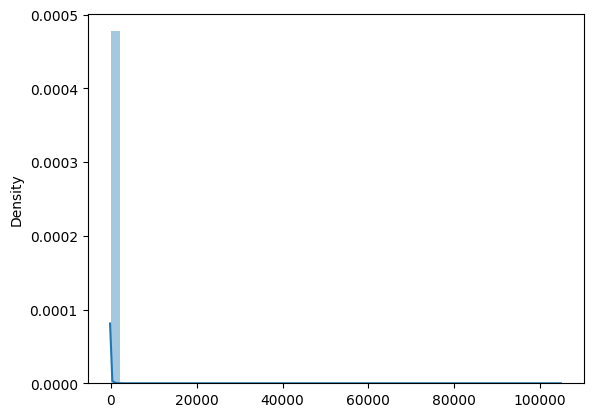

In [11]:
ax = sns.distplot(test_data['fpkm_unstranded'].dropna().to_numpy())
ax.set_xlim(0,)

## Apply dimension reduction and plotting 

1. To see if we can differentiate different classes of tumor labels ?
2. What do the distributions of important features/genes look like ?

In [20]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
ge_kidney_cancer_data = fpkm_unstr_df_with_labels[
gene_cols
].values
scaled_ge_data = StandardScaler().fit_transform(ge_kidney_cancer_data)